In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [8]:
df=pd.read_excel(r"E:\Book2.xlsx")
df.head()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"


In [63]:
df.shape

(269, 71)

In [9]:
df.isna().sum()

1Gender of respondent                                                   0
2 How old are you?                                                      0
3 Which city do you shop online from?                                   0
4 What is the Pin Code of where you shop online from?                   0
5 Since How Long You are Shopping Online ?                              0
                                                                       ..
Longer delivery period                                                  0
Change in website/Application design                                    0
Frequent disruption when moving from one page to another                0
Website is as efficient as before                                       0
Which of the Indian online retailer would you recommend to a friend?    0
Length: 71, dtype: int64

In [10]:
df.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                                                                                                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                          --------------  ----- 
 0   1Gender of respondent                                                                                                                                                                                           269 non-null    object
 1   2 How old are you?                                                                                                                                                                    

In [20]:
#Let's check coloumns uniqueness :

for i in df.columns:
    print (i,':',len(df[i].unique()))


1Gender of respondent : 2
2 How old are you?  : 5
3 Which city do you shop online from? : 11
4 What is the Pin Code of where you shop online from? : 39
5 Since How Long You are Shopping Online ? : 5
6 How many times you have made an online purchase in the past 1 year? : 6
7 How do you access the internet while shopping on-line? : 4
8 Which device do you use to access the online shopping? : 4
9 What is the screen size of your mobile device?						                                         : 4
10 What is the operating system (OS) of your device?				                                           : 3
11 What browser do you run on your device to access the website?			                                                           : 4
12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                    : 3
13 After first visit, how do you reach the online retail store?				                                           

In [174]:
#Renaming Columns

df=df.rename(columns={'1Gender of respondent':'Gender','2 How old are you? ':'Age',
                     '3 Which city do you shop online from?':'City',
                     '4 What is the Pin Code of where you shop online from?':'Pincode',
                     '5 Since How Long You are Shopping Online ?':'Years of shopping',
                     '6 How many times you have made an online purchase in the past 1 year?':
                      'Purchase in last one year','7 How do you access the internet while shopping on-line?':
                     'Internet_Access','8 Which device do you use to access the online shopping?':'Device used',
                     '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ':'Device_Screen_Size',
                     '10 What is the operating system (OS) of your device?\t\t\t\t                                          ':'OS',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ':'Browser',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ':'Channel_Followed',
       '13 After first visit, how do you reach the online retail store?\t\t\t\t                                                   ':'Reach_to_online_store',
       '14 How much time do you explore the e- retail store before making a purchase decision?                                                                   ':'Time_spent',
       '15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                               ':'Payment_option',
       '16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t                                                   ':'Abondon',
       '17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t                                                                                                                                                       ':'Reason_of_Abondon',
       '18 The content on the website must be easy to read and understand':'Content_type',
       '19 Information on similar product to the one highlighted  is important for product comparison':'similar_product_info',
       '20 Complete information on listed seller and product being offered is important for purchase decision.':'complete_info_importance',
       '21 All relevant information on listed products must be stated clearly':'Relevent info',
       '22 Ease of navigation in website':'Navigation', '23 Loading and processing speed':'Website speed',
       '26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time':'Trust',
       '27 Empathy (readiness to assist with queries) towards the customers':'Empathy',
       '28 Being able to guarantee the privacy of the customer':'Customer privacy guarantee',
       '29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)':'Responsiveness and availability',
       '30 Online shopping gives monetary benefit and discounts':'Benefits and discounts',
       '33 Return and replacement policy of the e-tailer is important for purchase decision':'Importance of return and replacement',
       '34 Gaining access to loyalty programs is a benefit of shopping online':'Loyalty program benefits',
       '35 Displaying quality Information on the website improves satisfaction of customers':'Display quality info',
       '36 User derive satisfaction while shopping on a good quality website or application':'User derive satisfaction',
       '37 Net Benefit derived from shopping online can lead to users satisfaction':'Net benefit Derived',
       '39 Offering a wide variety of listed product in several category':'Offering wide variety',
       '42 The Convenience of patronizing the online retailer':'Convenience',
       '43 Shopping on the website gives you the sense of adventure':'Adventure',
       '44 Shopping on your preferred e-tailer enhances your social status':'Social status',
       '45 You feel gratification shopping on your favorite e-tailer':'Feel Gratification',
       'Frequent disruption when moving from one page to another':'Disruptive',
       'Which of the Indian online retailer would you recommend to a friend?':'Recommendation'})

In [175]:
df.columns

Index(['Gender', 'Age', 'City', 'Pincode', 'Years of shopping',
       'Purchase in last one year', 'Internet_Access', 'Device used',
       'Device_Screen_Size', 'OS', 'Browser', 'Channel_Followed',
       'Reach_to_online_store', 'Time_spent', 'Payment_option', 'Abondon',
       'Reason_of_Abondon', 'Content_type', 'similar_product_info',
       'complete_info_importance', 'Relebent info', 'Navigation',
       'Website speed', '24 User friendly Interface of the website',
       '25 Convenient Payment methods', 'Trust', 'Empathy',
       'Customer privacy guarantee', 'Responsiveness and availability',
       'Benefits and discounts',
       '31 Enjoyment is derived from shopping online',
       '32 Shopping online is convenient and flexible',
       'Importance of return and replacement', 'Loyalty program benefits',
       'Display quality info', 'User derive satisfaction',
       'Net benefit Derived',
       '38 User satisfaction cannot exist without trust',
       'Offering wide va

In [76]:
df.head()

,Gender,Age,City,Pincode,Years of shopping,Purchase in last one year,Internet_Access,Device used,Device_Screen_Size,OS,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Disruptive,Website is as efficient as before,Recommendation
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"


In [77]:
#For value counts
for i in df.columns:
    print (i,':'
            ,(df[i].value_counts()))

Gender : Female    181
Male       88
Name: Gender, dtype: int64
Age : 31-40 years           81
21-30 years           79
41-50 yaers           70
Less than 20 years    20
51 years and above    19
Name: Age, dtype: int64
City : Delhi            58
Greater Noida    43
Noida            40
Bangalore        37
Karnal           27
Solan            18
Ghaziabad        18
Gurgaon          12
Merrut            9
Moradabad         5
Bulandshahr       2
Name: City, dtype: int64
Pincode : 201308    38
132001    19
201310    18
110044    16
173212     9
250001     9
173229     9
560037     8
132036     8
560010     8
122018     8
110011     7
201306     7
110008     7
110014     6
110018     6
244001     5
201312     5
530068     5
201305     5
201009     5
201008     5
201005     4
201001     4
201304     4
110039     4
110030     4
110009     4
560018     4
560003     4
122009     4
560002     4
110042     4
201303     4
560013     3
203001     2
560001     1
203207     1
203202     1
Name: Pincod

# DATA VISUALISATION

<AxesSubplot:xlabel='Gender', ylabel='count'>

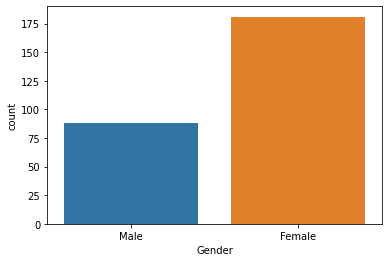

In [78]:
sns.countplot(x='Gender',data=df)

<AxesSubplot:xlabel='Age', ylabel='count'>

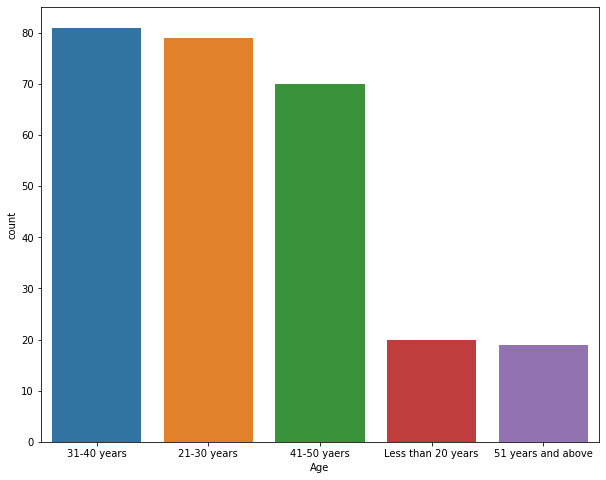

In [194]:
plt.figure(figsize=(10,8))
sns.countplot(x="Age",data=df)

<AxesSubplot:xlabel='City', ylabel='count'>

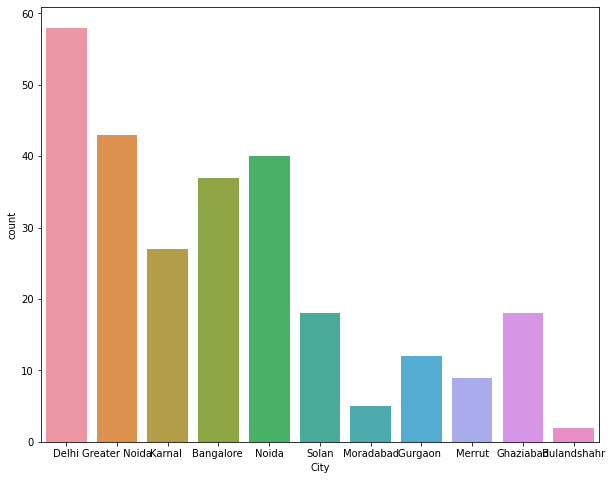

In [191]:
plt.figure(figsize=(10,8))
sns.countplot(x='City',data=df)

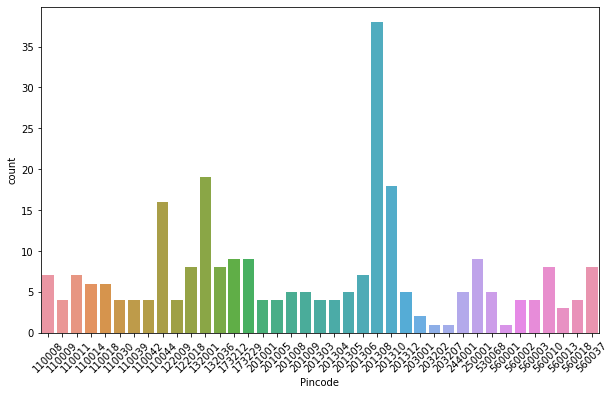

In [112]:
plt.figure(figsize=(10,6))
sns.countplot(x='Pincode',data=df)
plt.xticks(rotation=45)
plt.show()

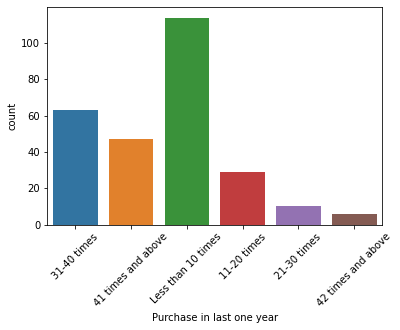

In [113]:
sns.countplot(x='Purchase in last one year',data=df)
plt.xticks(rotation=45)
plt.show()

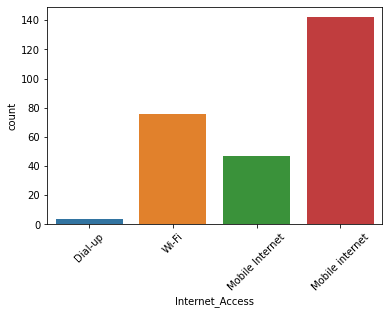

In [114]:
sns.countplot(x='Internet_Access',data=df)
plt.xticks(rotation=45)
plt.show()

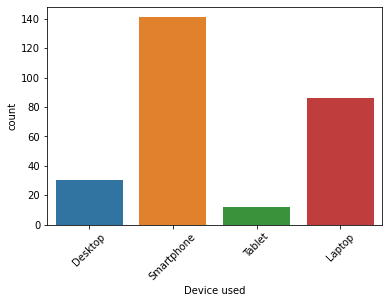

In [115]:
sns.countplot(x='Device used',data=df)
plt.xticks(rotation=45)
plt.show()

In [119]:
col = df[['OS', 'Browser', 'Channel_Followed',
       'Reach_to_online_store', 'Time_spent', 'Payment_option', 'Abondon',
       'Reason_of_Abondon', 'Content_type', 'similar_product_info',
       'complete_info_importance', 'Relebent info', 'Navigation']]

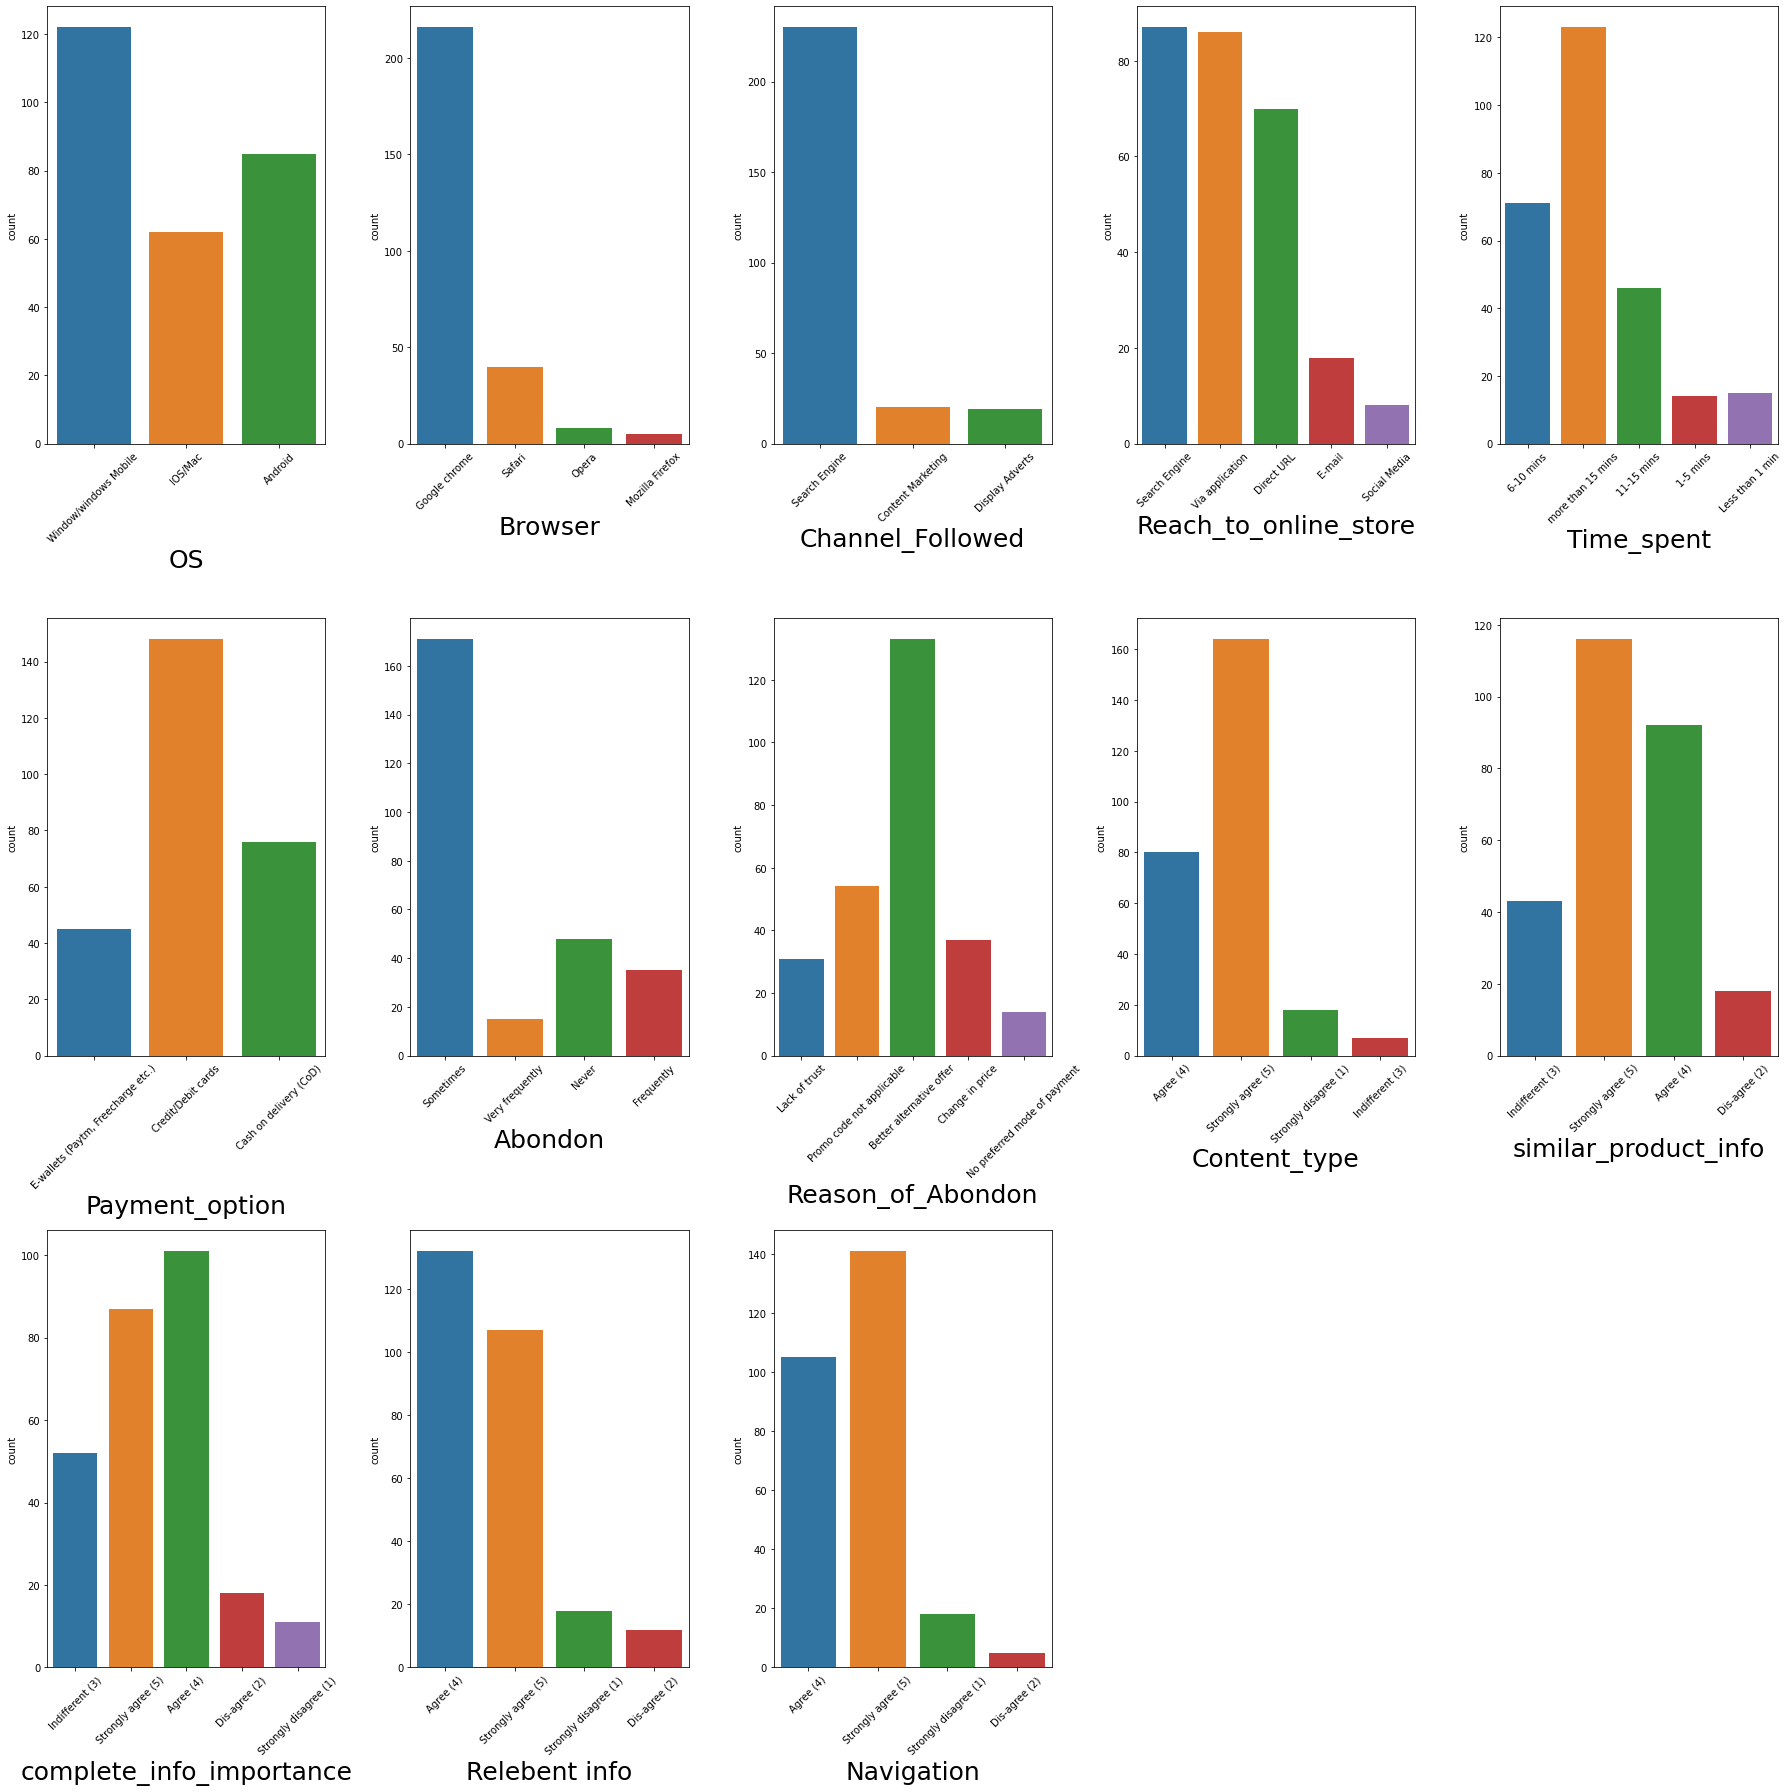

In [123]:
plt.figure(figsize=(25,25))
plotnumber=1

for column in col:
    if plotnumber<=15:
        ax=plt.subplot(3,5,plotnumber)
        sns.countplot(col[column])
        plt.xlabel(column,fontsize=25)
        plt.xticks(rotation=45)
    plotnumber+=1
plt.tight_layout()

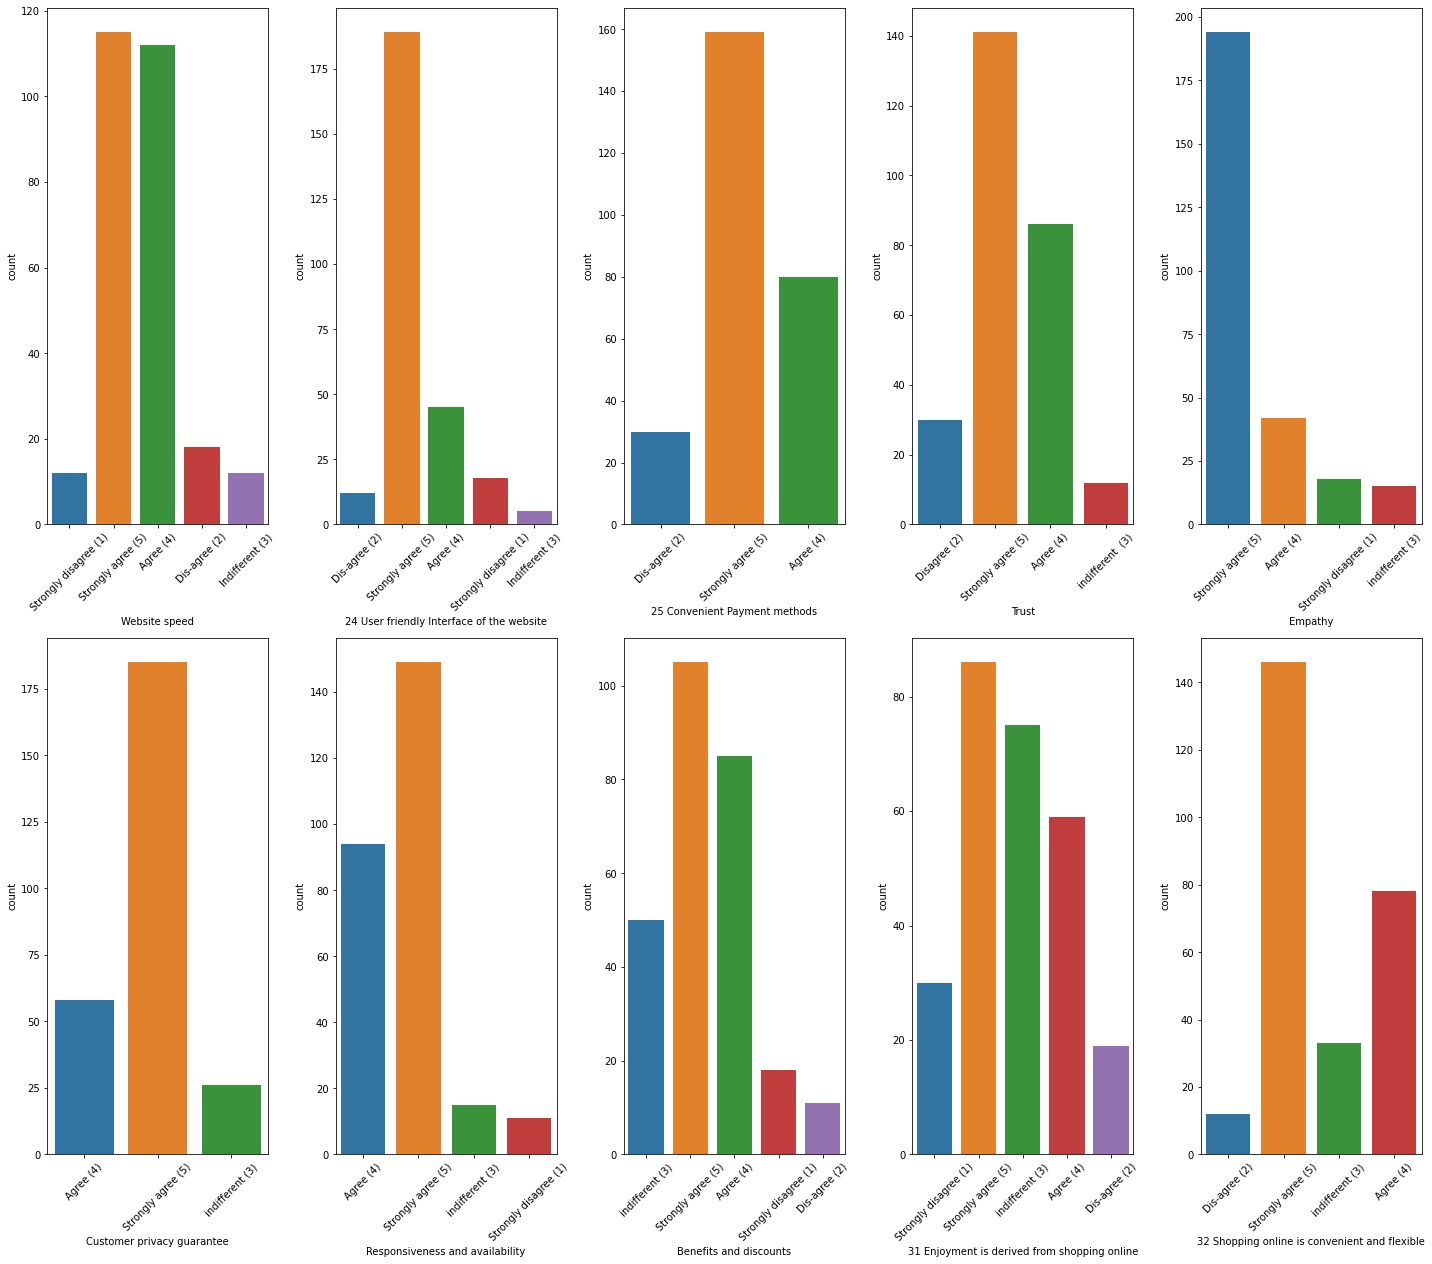

In [130]:
col1=df[['Website speed', '24 User friendly Interface of the website',
       '25 Convenient Payment methods', 'Trust', 'Empathy',
       'Customer privacy guarantee', 'Responsiveness and availability',
       'Benefits and discounts',
       '31 Enjoyment is derived from shopping online',
       '32 Shopping online is convenient and flexible']]

plt.figure(figsize=(20,25))
plotnumber=1

for column in col1:
    if plotnumber<=15:
        ax=plt.subplot(3,5,plotnumber)
        sns.countplot(col1[column])
        plt.xlabel(column,fontsize=10)
        plt.xticks(rotation=45)
    plotnumber+=1
plt.tight_layout()

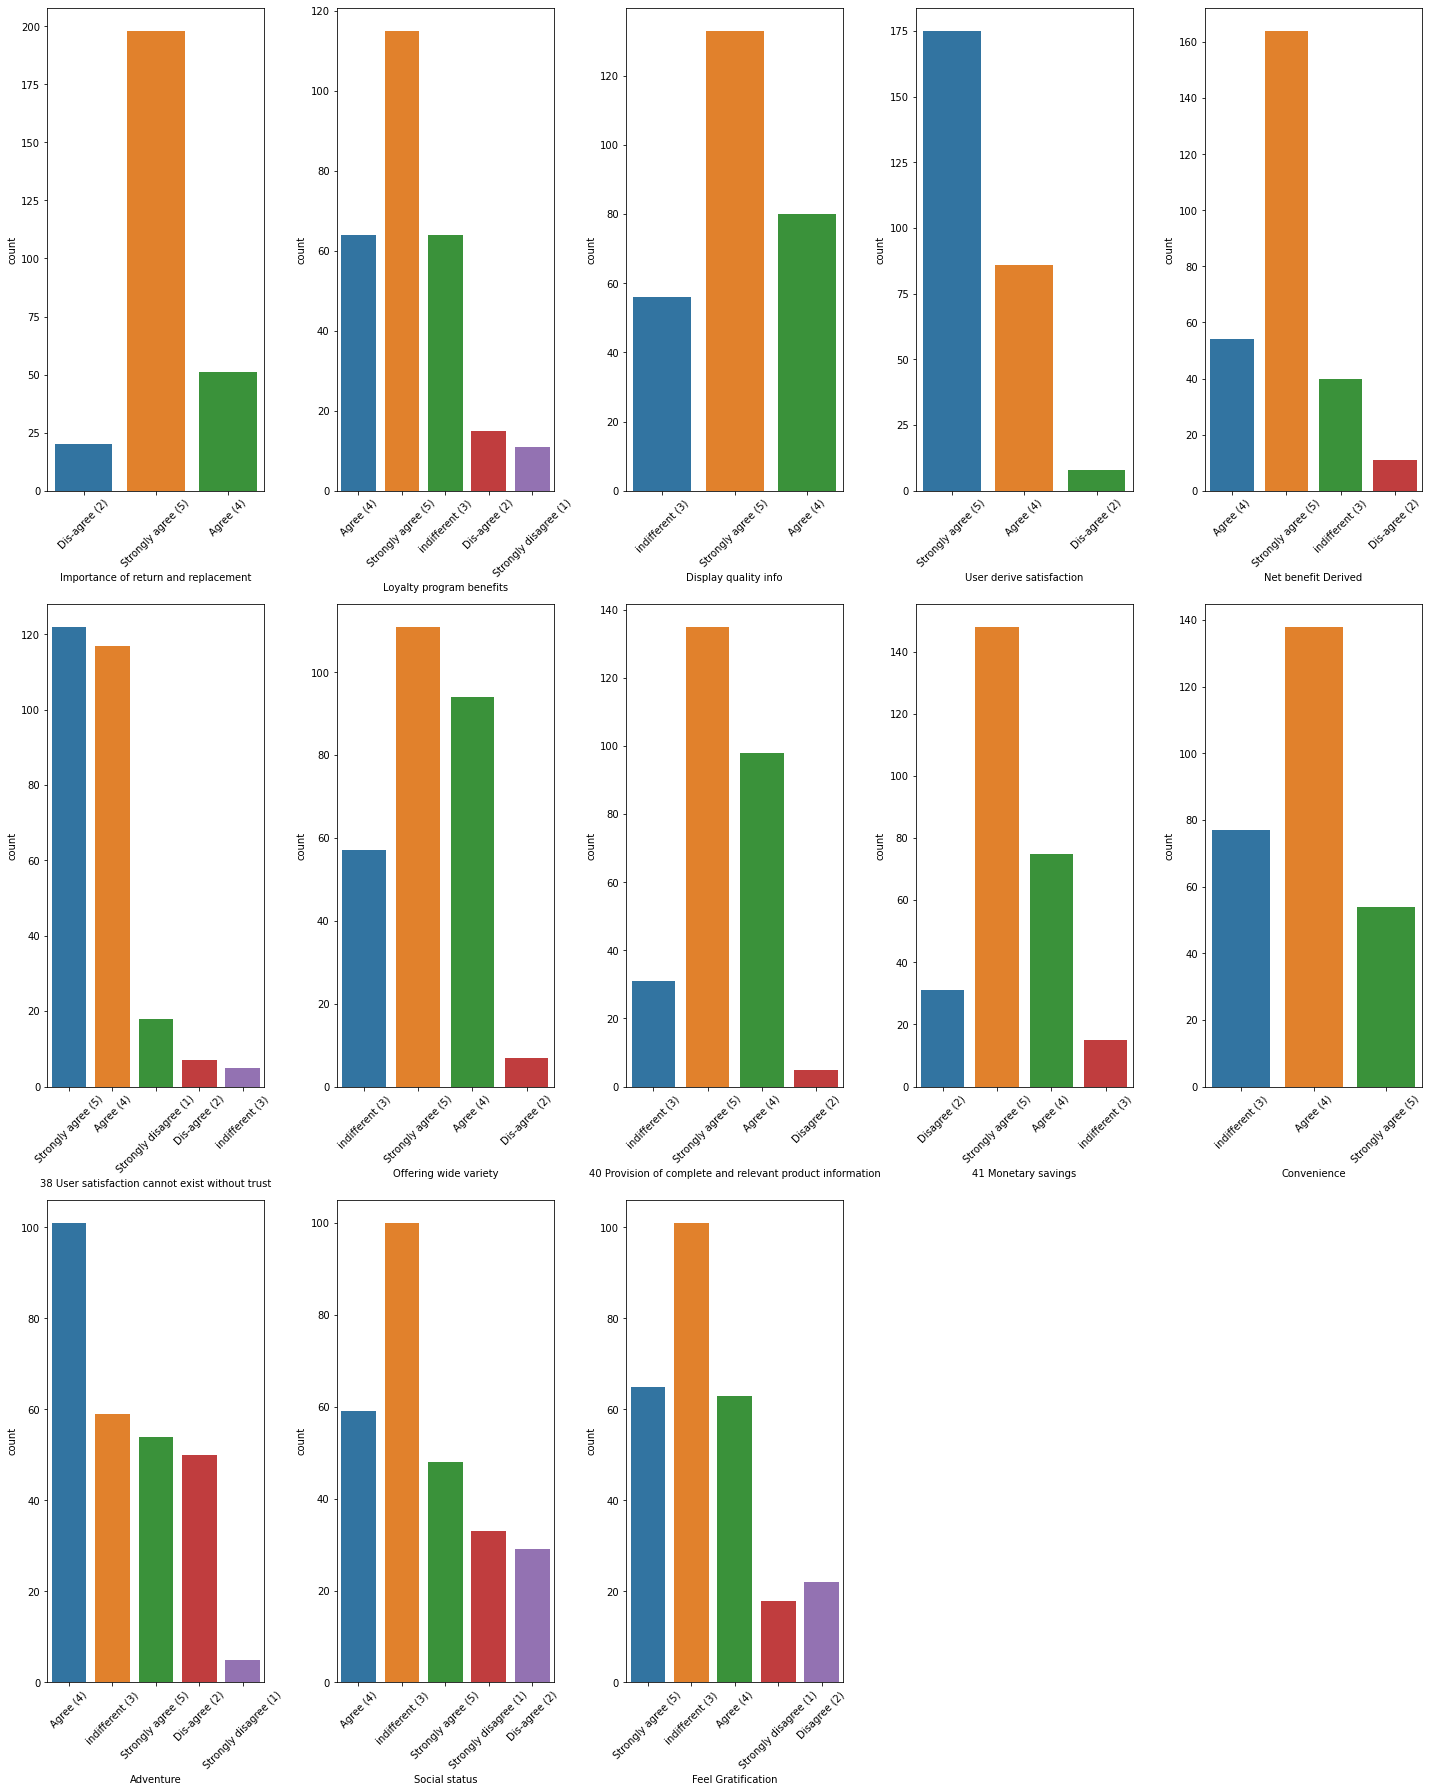

In [134]:
col2=df[['Importance of return and replacement', 'Loyalty program benefits',
       'Display quality info', 'User derive satisfaction',
       'Net benefit Derived',
       '38 User satisfaction cannot exist without trust',
       'Offering wide variety',
       '40 Provision of complete and relevant product information',
       '41 Monetary savings', 'Convenience', 'Adventure', 'Social status',
       'Feel Gratification']]

plt.figure(figsize=(20,25))
plotnumber=1

for column in col2:
    if plotnumber<=15:
        ax=plt.subplot(3,5,plotnumber)
        sns.countplot(col2[column])
        plt.xlabel(column,fontsize=10)
        plt.xticks(rotation=45)
    plotnumber+=1
plt.tight_layout()

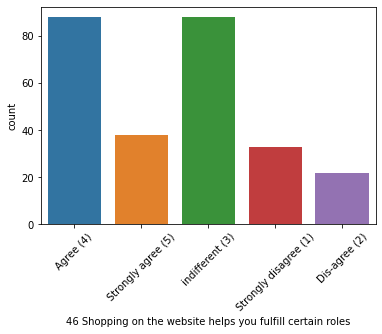

In [141]:
sns.countplot(x='46 Shopping on the website helps you fulfill certain roles',data=df)
plt.xticks(rotation=45)
plt.show()

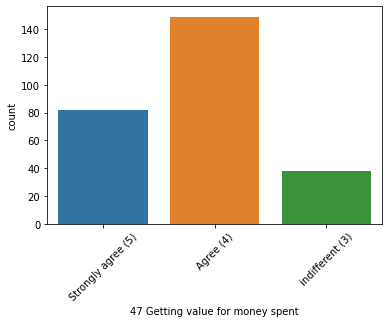

In [142]:
sns.countplot(x='47 Getting value for money spent',data=df)
plt.xticks(rotation=45)
plt.show()

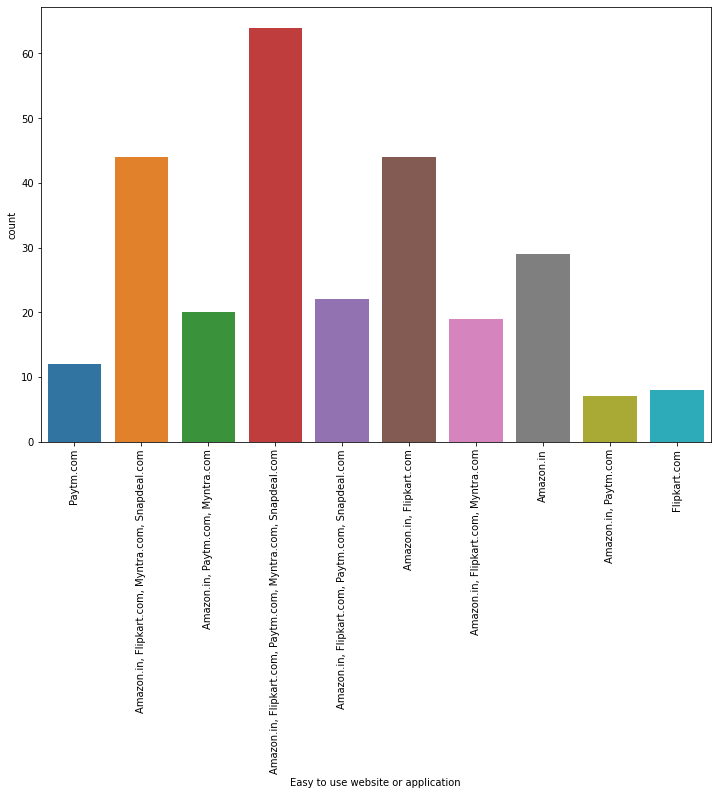

In [146]:
plt.figure(figsize=(12,8))
sns.countplot(x= 'Easy to use website or application',data=df)
plt.xticks(rotation=90)
plt.show()

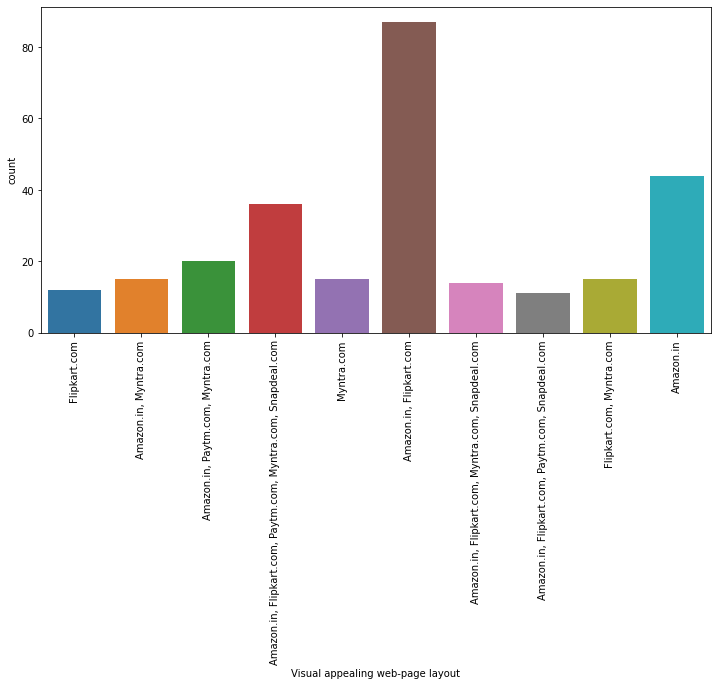

In [150]:
plt.figure(figsize=(12,6))
sns.countplot(x= 'Visual appealing web-page layout',data=df)
plt.xticks(rotation=90)
plt.show()

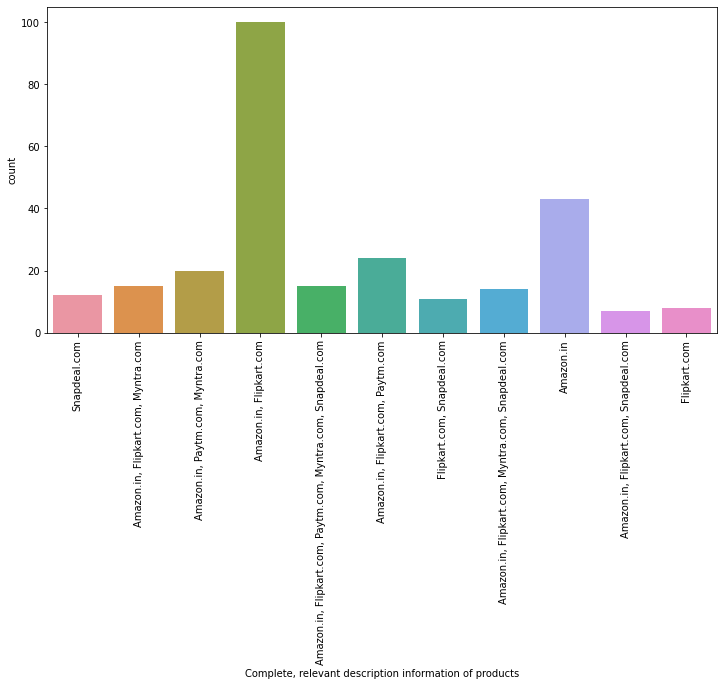

In [151]:
plt.figure(figsize=(12,6))
sns.countplot(x= 'Complete, relevant description information of products',data=df)
plt.xticks(rotation=90)
plt.show()

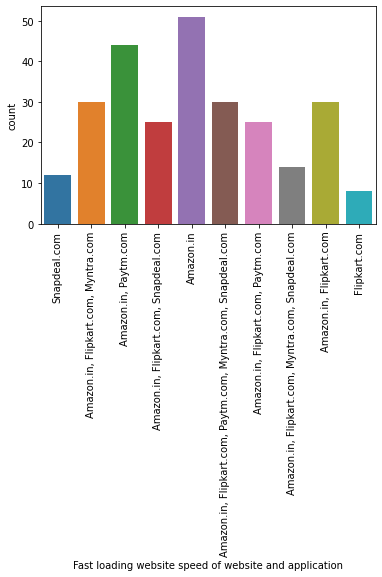

In [169]:
sns.countplot(x= 'Fast loading website speed of website and application',data=df)
plt.xticks(rotation=90)
plt.show()

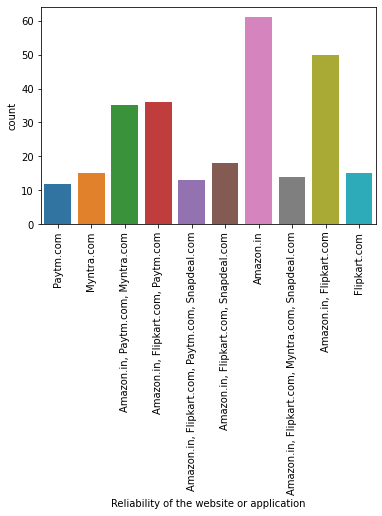

In [153]:
sns.countplot(x= 'Reliability of the website or application',data=df)
plt.xticks(rotation=90)
plt.show()

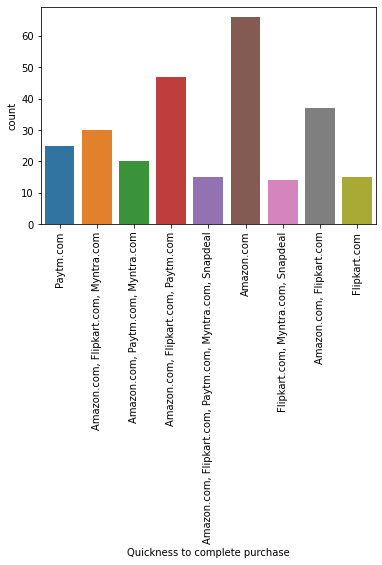

In [154]:
sns.countplot(x= 'Quickness to complete purchase',data=df)
plt.xticks(rotation=90)
plt.show()

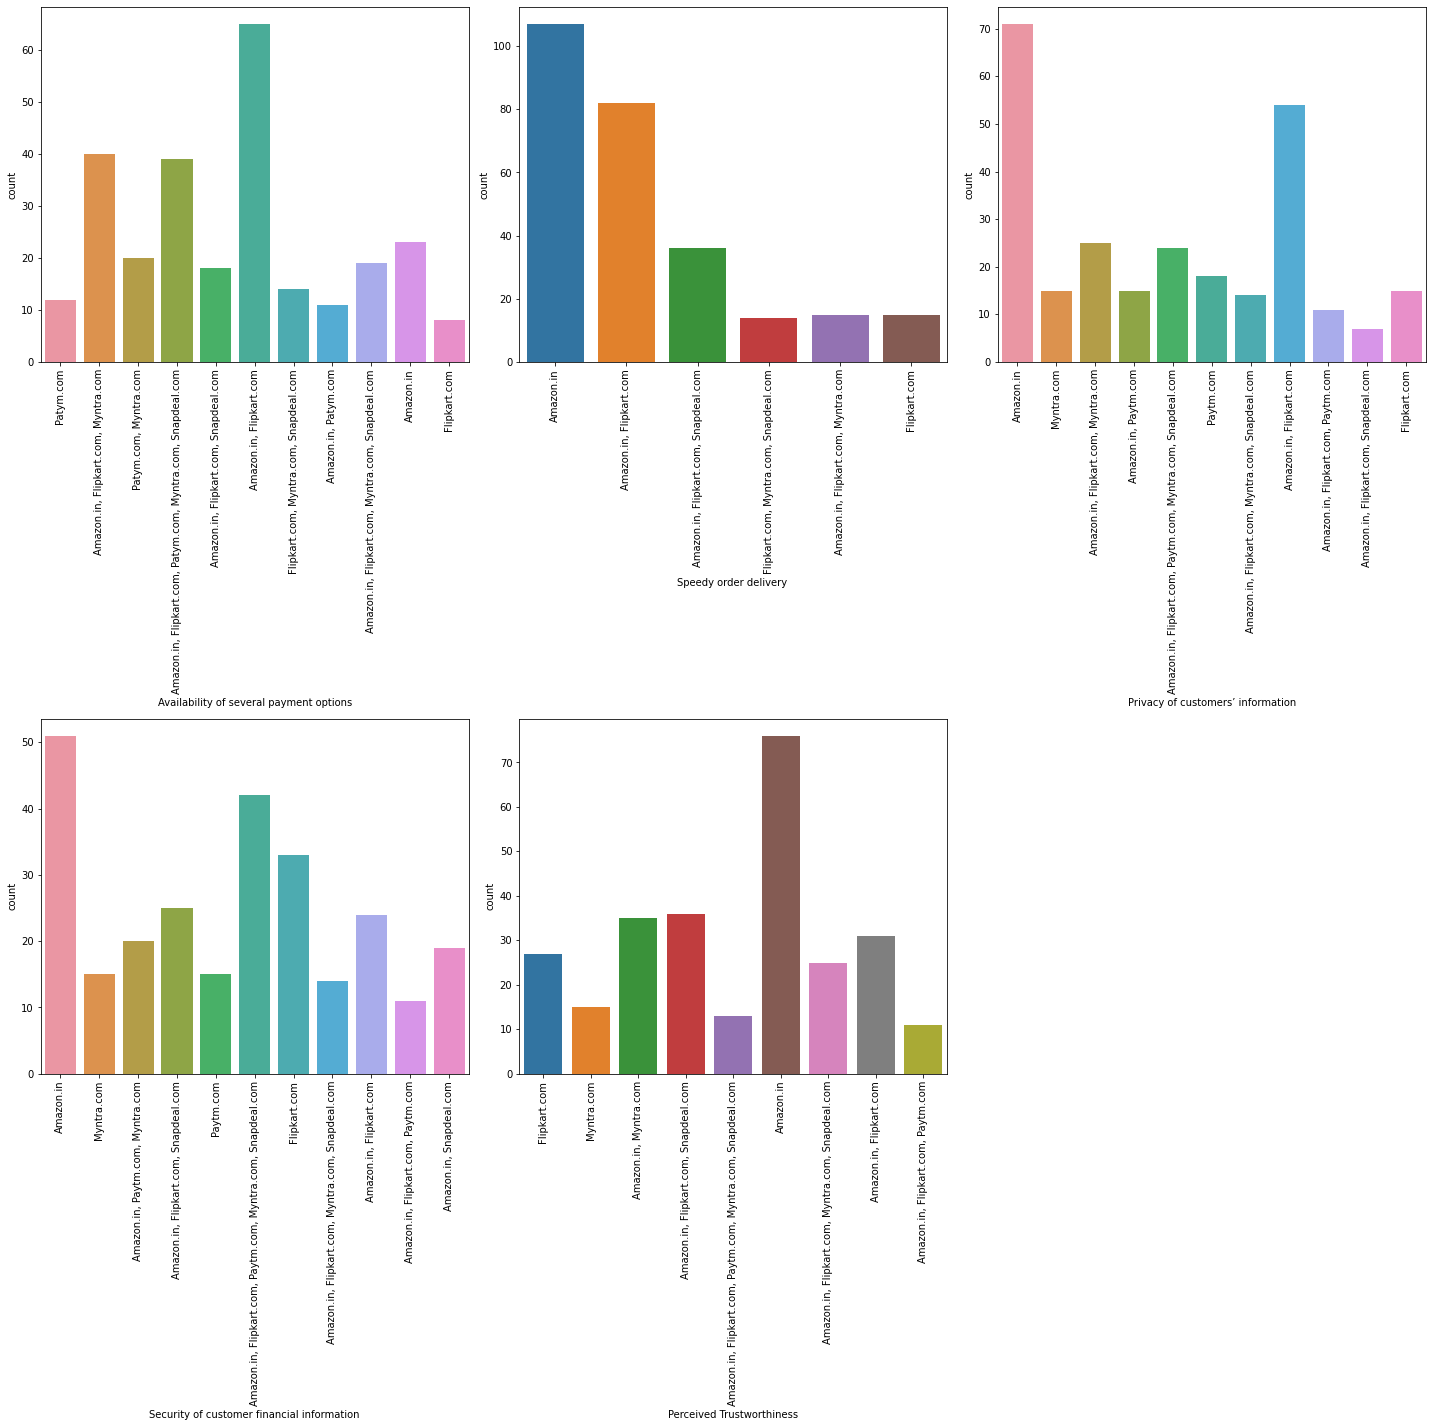

In [158]:
 col3=df[['Availability of several payment options', 'Speedy order delivery ',
       'Privacy of customers’ information',
       'Security of customer financial information',
       'Perceived Trustworthiness']]

plt.figure(figsize=(20,25))
plotnumber=1

for column in col3:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.countplot(col3[column])
        plt.xlabel(column,fontsize=10)
        plt.xticks(rotation=90)
    plotnumber+=1
plt.tight_layout()

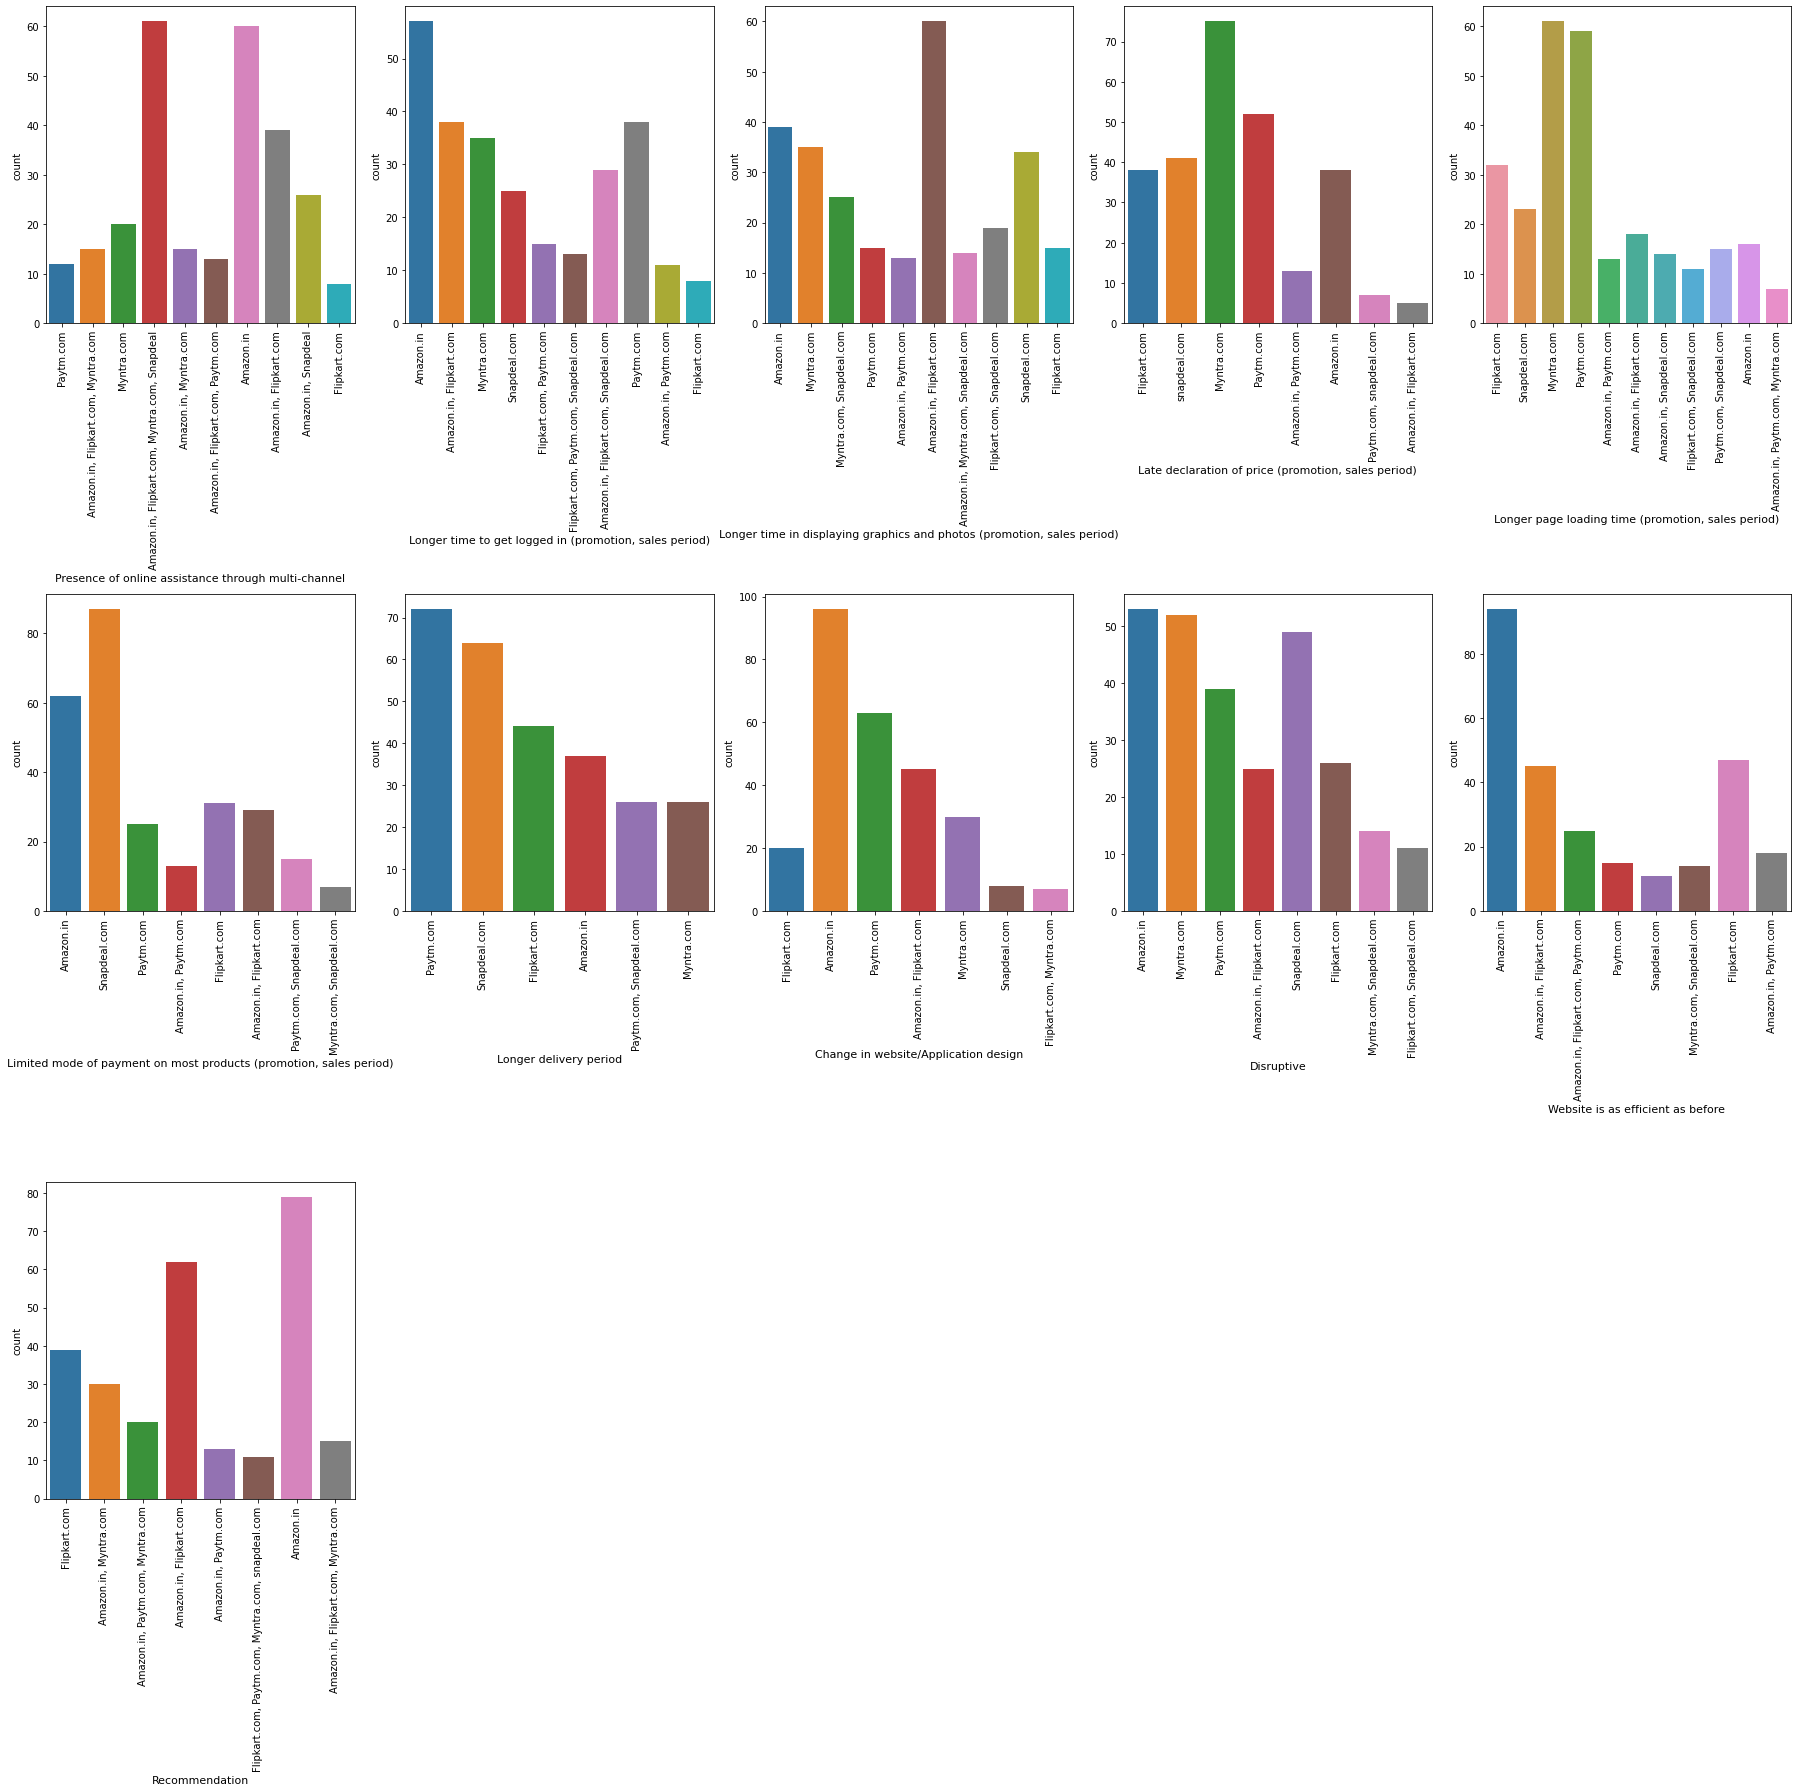

In [165]:
col4=df[[  'Presence of online assistance through multi-channel',
       'Longer time to get logged in (promotion, sales period)',
       'Longer time in displaying graphics and photos (promotion, sales period)',
       'Late declaration of price (promotion, sales period)',
       'Longer page loading time (promotion, sales period)',
       'Limited mode of payment on most products (promotion, sales period)',
       'Longer delivery period', 'Change in website/Application design',
       'Disruptive', 'Website is as efficient as before', 'Recommendation']]

plt.figure(figsize=(25,25))
plotnumber=1

for column in col4:
    if plotnumber<=15:
        ax=plt.subplot(3,5,plotnumber)
        sns.countplot(col4[column])
        plt.xlabel(column,fontsize=11)
        plt.xticks(rotation=90)
    plotnumber+=1
plt.tight_layout()